<center><h1> 项目一 </h1></center>
<center><h2> 以色列与巴勒斯坦的恐怖主义战争 </h2></center>


## 1. 项目背景介绍

- 问题背景

简要背景如下：

以色列与巴勒斯坦之间的冲突起源于20世纪初，随着犹太复国主义运动的兴起和大规模犹太移民定居巴勒斯坦，局势逐渐恶化。巴以冲突不仅是领土和国家主权的问题，还涉及民族认同、宗教信仰和历史伤痕。国际社会多次“尝试调解”，但至今未能找到双方都能接受的解决方案，23年到24年巴以更是围绕加沙地区爆发了剧烈的冲突。

在23年十月起，笔者对于巴以冲突就偶有关注。为了更好地了解这一国际矛盾的情况，本项目将利用聚类算法和nlp算法对巴以冲突中死难者的信息进行探索。笔者采用的数据集是采集于2000年10月到2023年9月的部分死难者信息。由于国际环境的一些原因，加上数据集中一些数据的表现，笔者猜测数据集采集得并不完全，甚至可能有部分错漏的信息。数据集中记录了每一位死难者的姓名，性别，死亡年龄，死亡日期，死亡地点，国籍，居留地区，死因和备注等等详细信息。

- 文件列表

  该数据集包含1个文件

  - fatalities_isr_pse_conflict_2000_to_2023.csv

下面对该数据集内容进行说明：

- 数据集的整体特征

| 数据集名称   | 数据类型 | 特征数 | 实例数 | 值缺失 | 相关任务   |
| :----------- | :------- | :----- | :----- | :----- | :--------- |
| 2000到2023年巴以冲突死难者数据 | 数值数据+文本数据 | 16     | 11024   | 部分值缺失     | 聚类、文本分类 |

- 属性描述
  **文件fatalities_isr_pse_conflict_2000_to_2023.csv包含16个字段，具体信息如下：**
  每一行代表的是一种红葡萄酒

| No   | 属性                             | 数据类型 | 字段描述               
| :--- | :------------------------------- | :------- | :--------------------- 
| 1    | name                             | Text  | 死者姓名             
| 2    | date_of_event                    | Date  | 死亡事件发生日期           
| 3    | age                              | Numeric  | 死者年龄               
| 4    | citizenship                      | Text     | 国籍                   
| 5    | event_location                   | Text     | 事件发生的地点          
| 6    | event_location_district          | Text     | 事件发生的区域（比地点大一级的地理单位） 
| 7    | event_location_region            | Text     | 事件发生的地域（比区域大一级的地理单位）       
| 8    | date_of_death                    | Date     | 死亡日期                   
| 9    | gender                           | Char     | 性别                 
| 10   | took_part_in_the_hostilities     | Text     | 是否参与了恐怖事件（二值化的文本）       
| 11   | place_of_residence               | Text     | 居住地点                   
| 12   | place_of_residence_district      | Text     | 居住区域 
| 13   | type_of_injury                   | Text     | 受伤类型                 
| 14   | ammunition                       | Text     | （被）类型弹药（击中）       
| 15   | killed_by                        | Text     | 凶手                   
| 16   | notes                            | Text     | 备注 

在这个项目中，我们将探索以下任务：

- 死难者的时空分布？

- 死难者的国籍特征，年龄分布，性别分布，凶手的特征？

- 什么武器才是导致死亡的最主要因素？（这个问题的结果让笔者有点吃惊）

- 死难者的聚类与大类死难者的特征？

- 能否通过备注对死难者画像？各类死难者的关键词是什么？

在这个项目中，我们将使用数据可视化，DBSCAN聚类模型，TF-IDF特征提取，线性分类模型去尝试解答这些问题。

# 数据收集与整理

- 导入相关库  

In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

- 读取数据并显示前5个样本信息   
让我们先来看看数据样本长啥样？

In [40]:
data = pd.read_csv('/home/jovyan/work/项目1-实训案例内容开发/fatalities_isr_pse_conflict_2000_to_2023.csv')
data.head().T

0  \
name                                'Abd a-Rahman Suleiman Muhammad Abu Daghash   
date_of_event                                                        2023-09-24   
age                                                                        32.0   
citizenship                                                         Palestinian   
event_location                                                   Nur Shams R.C.   
event_location_district                                                 Tulkarm   
event_location_region                                                 West Bank   
date_of_death                                                        2023-09-24   
gender                                                                        M   
took_part_in_the_hostilities                                                NaN   
place_of_residence                                               Nur Shams R.C.   
place_of_residence_district                                             Tulkarm   
type_of_injury                                                          gunfire   
ammunition                                                      live ammunition   
killed_by                                               Israeli security forces   
notes                         Fatally shot by Israeli forces while standing ...   

                                                                              1  \
name                                       Usayed Farhan Muhammad 'Ali Abu 'Ali   
date_of_event                                                        2023-09-24   
age                                                                        21.0   
citizenship                                                         Palestinian   
event_location                                                   Nur Shams R.C.   
event_location_district                                                 Tulkarm   
event_location_region                                                 West Bank   
date_of_death                                                        2023-09-24   
gender                                                                        M   
took_part_in_the_hostilities                                                NaN   
place_of_residence                                               Nur Shams R.C.   
place_of_residence_district                                             Tulkarm   
type_of_injury                                                          gunfire   
ammunition                                                      live ammunition   
killed_by                                               Israeli security forces   
notes                         Fatally shot by Israeli forces while trying to...   

                                                                              2  \
name                                           'Abdallah 'Imad Sa'ed Abu Hassan   
date_of_event                                                        2023-09-22   
age                                                                        16.0   
citizenship                                                         Palestinian   
event_location                                                         Kfar Dan   
event_location_district                                                   Jenin   
event_location_region                                                 West Bank   
date_of_death                                                        2023-09-22   
gender                                                                        M   
took_part_in_the_hostilities                                                NaN   
place_of_residence                                                     al-Yamun   
place_of_residence_district                                               Jenin   
type_of_injury                                                          gunfire   
ammunition                                                      live ammunition   
killed_by

观察数据集的数据量和特征量

In [41]:
data.shape

(11124, 16)

数据集的各个属性的名称和类型，同时观察一下有多少非空的数据，借此来把握大概有多少缺失数据

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

观察一下数值类型数据的大致分布情况以及极差。

In [43]:
data.describe()

age
count  10995.000000
mean      26.745703
std       13.780548
min        1.000000
25%       19.000000
50%       23.000000
75%       31.000000
max      112.000000

结果稍微令人吃惊，有超过25%的死者年龄低于19岁，50%的死者年龄低于23岁。
接着观察所有类型数据的分布情况。

In [44]:
data.describe(include="all").T

count unique  \
name                            11124  11083   
date_of_event                   11124   2405   
age                           10995.0    NaN   
citizenship                     11124      4   
event_location                  11124    494   
event_location_district         11124     20   
event_location_region           11124      3   
date_of_death                   11124   2593   
gender                          11104      2   
took_part_in_the_hostilities     9694      5   
place_of_residence              11056    580   
place_of_residence_district     11056     20   
type_of_injury                  10833     13   
ammunition                       5871     21   
killed_by                       11124      3   
notes                           10844   6744   

                                                                      top  \
name                                             Name unknown to B'Tselem   
date_of_event                                                  2008-12-27   
age                                                                   NaN   
citizenship                                                   Palestinian   
event_location                                                  Gaza City   
event_location_district                                              Gaza   
event_location_region                                          Gaza Strip   
date_of_death                                                  2008-12-27   
gender                                                                  M   
took_part_in_the_hostilities                                           No   
place_of_residence                                              Gaza city   
place_of_residence_district                                          Gaza   
type_of_injury                                                    gunfire   
ammunition                                                        missile   
killed_by                                         Israeli security forces   
notes                         Killed during "Operation Defensive Shield."   

                               freq       mean        std  min   25%   50%  \
name                             23        NaN        NaN  NaN   NaN   NaN   
date_of_event                   357        NaN        NaN  NaN   NaN   NaN   
age                             NaN  26.745703  13.780548  1.0  19.0  23.0   
citizenship                   10092        NaN        NaN  NaN   NaN   NaN   
event_location                 2232        NaN        NaN  NaN   NaN   NaN   
event_location_district        2435        NaN        NaN  NaN   NaN   NaN   
event_location_region          7733        NaN        NaN  NaN   NaN   NaN   
date_of_death                   341        NaN        NaN  NaN   NaN   NaN   
gender                         9681        NaN        NaN  NaN   NaN   NaN   
took_part_in_the_hostilities   4653        NaN        NaN  NaN   NaN   NaN   
place_of_residence             2283        NaN        NaN  NaN   NaN   NaN   
place_of_residence_district    2453        NaN        NaN  NaN   NaN   NaN   
type_of_injury                 9849        NaN        NaN  NaN   NaN   NaN   
ammunition                     2877        NaN        NaN  NaN   NaN   NaN   
killed_by                     10000        NaN        NaN  NaN   NaN   NaN   
notes                           113        NaN        NaN  NaN   NaN   NaN   

                               75%    max  
name                           NaN    NaN  
date_of_event                  NaN    NaN  
age                           31.0  112.0  
citizenship                    NaN    NaN  
event_location                 NaN    NaN  
event_location_district        NaN    NaN  
event_location_region          NaN    NaN  
date_of_death                  NaN    NaN  
gender                         NaN    NaN  
took_part_in_the_hostilities   NaN    NaN  
place_of_residence             NaN    NaN  
place_of_residence_district    NaN    NaN  
type_o

**可以看出：**
- 死者绝大部分为巴勒斯坦籍；
- 死亡事件发生的主要地点为**加沙**城，最主要区域为**加沙**，最主要地域为**加沙**地带。
- 死者主要的居住地点为**加沙**城，主要居住区域为**加沙**。
- 未包含缺省信息，大部分死者并**没有参与恐怖主义活动**。
- **11124**条死者数据中，**10000**人被确认死于以色列国防军手中。

## 补充数据中的缺失值
- 先观察一下各个类别缺失的条数

In [45]:
missing_values = data.isnull().sum()

missing_columns = missing_values[missing_values > 0]

max_column_length = max(len("属性"), max(len(column) for column in missing_columns.index))
max_value_length = max(len("缺失条数"), len(str(missing_columns.max())))

print(f"{'属性':<{max_column_length}}\t\t{'缺失条数':<{max_value_length}}")
for column, missing_count in missing_columns.items():
    print(f"{column:<{max_column_length}}\t\t{missing_count:<{max_value_length}}")

属性                          		缺失条数
age                         		129 
gender                      		20  
took_part_in_the_hostilities		1430
place_of_residence          		68  
place_of_residence_district 		68  
type_of_injury              		291 
ammunition                  		5253
notes                       		280 


- 为了更直观地把握缺失量，计算各属性缺失量的占比

In [46]:
print(f"age缺失量:{(data['age'].isna().sum()/len(data))*100:.2f}%")
print(f"gender缺失量:{(data['gender'].isna().sum()/len(data))*100:.2f}%")
print(f"took_part_in_the_hostilities缺失量:{(data['took_part_in_the_hostilities'].isna().sum()/len(data))*100:.2f}%")
print(f"place_of_residence缺失量:{(data['place_of_residence'].isna().sum()/len(data))*100:.2f}%")
print(f"place_of_residence_district缺失量:{(data['place_of_residence_district'].isna().sum()/len(data))*100:.2f}%")
print(f"type_of_injury缺失量:{(data['type_of_injury'].isna().sum()/len(data))*100:.2f}%")
print(f"ammunition缺失量:{(data['ammunition'].isna().sum()/len(data))*100:.2f}%")
print(f"notes缺失量:{(data['notes'].isna().sum()/len(data))*100:.2f}%")

age缺失量:1.16%
gender缺失量:0.18%
took_part_in_the_hostilities缺失量:12.86%
place_of_residence缺失量:0.61%
place_of_residence_district缺失量:0.61%
type_of_injury缺失量:2.62%
ammunition缺失量:47.22%
notes缺失量:2.52%


可以看出，数据主要的缺失属性为（被）弹药类型（击中）

- 区别国籍来填充年龄的缺失值

In [47]:
data['citizenship'].unique()

array(['Palestinian', 'Israeli', 'Jordanian', 'American'], dtype=object)

死者来自四个不同的国籍：巴勒斯坦、以色列、约旦、美国

### 用各自国籍的年龄平均值来填充年龄缺失值

In [48]:
mean_ages = data.groupby('citizenship')['age'].mean()

def fill_missing_age(row):
    if pd.isnull(row['age']):
        return mean_ages[row['citizenship']]
    else:
        return row['age']

data['age'] = data.apply(fill_missing_age, axis=1)

### 用"L_Unknown"来填充性别的缺失值

- 出于对姓名是否可以对应性别的不了解，加上时间有限，笔者使用"L_Unknown"标签来填充性别的缺失值

In [49]:
data['gender']=data['gender'].fillna("L_Unknown")

### 分析并处理type_of_injury和ammunition的关系
- 先观察受伤类型和（被）类型弹药（击中）的属性，观察这两者是否存在关联关系。

在受伤类型和（被）类型弹药（击中）的属性仅有一项为空的情况下，尽量使用另一项来决定缺失值填充的内容。

为此，笔者找到受伤类型现有的类别、（被）类型弹药（击中）类型现有的类别、仅（被）类型弹药（击中）为空时受伤类型现有的类别、仅受伤类型为空时（被）类型弹药（击中）类型现有的类别，进行观察。

In [50]:
print("type_of_injury现有的类型:")
print(data['type_of_injury'].unique())
print("\n\nammunition现有的类型:")
print(data['ammunition'].unique())

print("type_of_injury 为空时的 ammunition 值:")
type_of_injury_null = data[data['type_of_injury'].isnull()]['ammunition']
print(type_of_injury_null)
print(data[data['type_of_injury'].isnull()]['ammunition'].unique())

print("\nammunition 为空时的 type_of_injury 值:")
ammunition_null = data[data['ammunition'].isnull()]['type_of_injury']
print(ammunition_null)
print(data[data['ammunition'].isnull()]['type_of_injury'].unique())

type_of_injury现有的类型:
['gunfire' 'stabbing' 'hit by a vehicle' 'explosion' 'physical assault'
 'shelling' 'being bludgeoned with an axe' 'physically assaulted'
 'beating' 'stones throwing' 'Strangulation' nan 'fire' 'house demolition']


ammunition现有的类型:
['live ammunition' 'missile' nan 'rocket' '0.22-caliber bullets' 'bomb'
 'knife' 'shell' 'rock' 'rubber-coated metal bullets' 'stun grenade'
 'teargas canister' 'flare bomb' 'sponge rounds' 'mortar fire'
 'grad rocket' 'flechette shells' 'phosphorus shell' 'Qassam rocket'
 'explosive belt' 'grenade' 'car bomb']
type_of_injury 为空时的 ammunition 值:
1557     NaN
1559     NaN
1563     NaN
1629     NaN
1630     NaN
        ... 
10494    NaN
10502    NaN
10504    NaN
10505    NaN
10506    NaN
Name: ammunition, Length: 291, dtype: object
[nan 'teargas canister']

ammunition 为空时的 type_of_injury 值:
40               gunfire
150              gunfire
180              gunfire
182              gunfire
189              gunfire
              ...       
1

观察上述缺失值，经过分析，我认为可以：
- 当 **"ammunition"为"teargas canister"（催泪瓦斯）而type_of_injury为空** 时，认定**type_of_injury**为已有类型中的 **gunfire**
- 当 **"type_of_injury"为"being bludgeoned with an axe"（被斧子砍死）和"stabbing"（刺死）而ammunition为空** 时，认定**ammunition**为已有类型中的 **knife**
- 当 **"type_of_injury"为"stones throwing"（被丢石头）而ammunition为空** 时，认定**ammunition**为已有类型中的 **rock**
- 当 **"type_of_injury"为"Strangulation"（被勒死）、"beating"（击打致死）以及"physical assault"和"physically assaulted"（物理打击）而ammunition为空** 时，认定**ammunition**为新类型 **cold weapon**
- 其他缺失值用"L_Unknown"来完成填充

In [51]:
def fill_missing_values(row):
    if pd.isnull(row['type_of_injury']) and row['ammunition'] == 'teargas canister':
        row['type_of_injury'] = 'gunfire'
    if pd.isnull(row['ammunition']):
        if row['type_of_injury'] in ['being bludgeoned with an axe', 'stabbing']:
            row['ammunition'] = 'knife'
        elif row['type_of_injury'] == 'stones throwing':
            row['ammunition'] = 'rock'
        elif row['type_of_injury'] in ['Strangulation', 'beating', 'physical assault', 'physically assaulted']:
            row['ammunition'] = 'cold weapon'
        else:
            row['ammunition'] = 'L_Unknown'
    if pd.isnull(row['type_of_injury']):
        row['type_of_injury'] = 'L_Unknown'
    return row

data = data.apply(fill_missing_values, axis=1)

如下属性的**缺失值**由于难以界定，笔者决定统一**用"L_Unknown"来完成填充：**
- gender
- took_part_in_the_hostilities
- place_of_residence           
- place_of_residence_district 

In [52]:
columns_to_fill = ['gender', 'took_part_in_the_hostilities', 'place_of_residence', 'place_of_residence_district']
data[columns_to_fill] = data[columns_to_fill].fillna('L_Unknown')

## 数据可视化
### 从各属性来观察死者的分布情况
#### 国籍

Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64

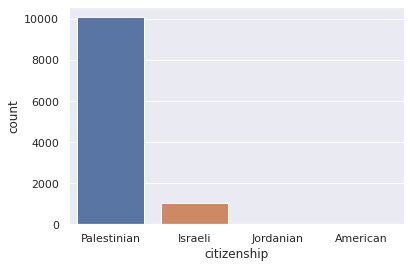

In [53]:
sns.set()
sns.countplot(x = 'citizenship',data = data)
data['citizenship'].value_counts()

#### 性别

M            9681
F            1423
L_Unknown      20
Name: gender, dtype: int64

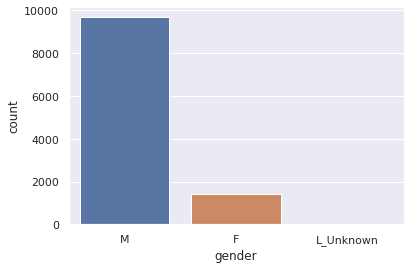

In [54]:
sns.countplot(x='gender',data = data)
data['gender'].value_counts()

#### 死因（区分国籍）

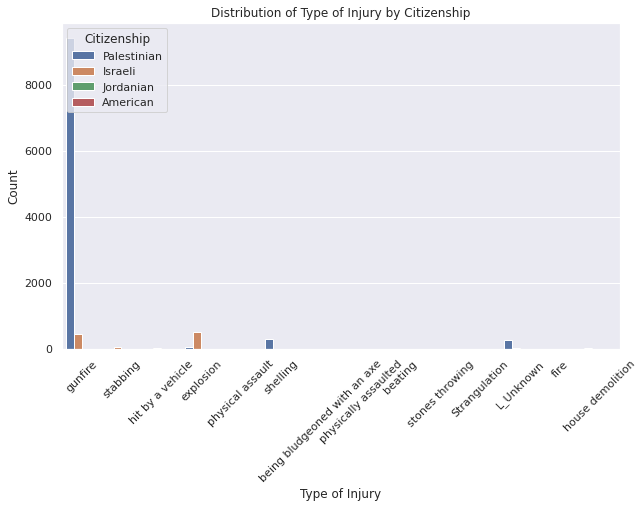

type_of_injury  L_Unknown  Strangulation  beating  \
citizenship                                         
American                0              0        0   
Israeli                11              1        4   
Jordanian               0              0        0   
Palestinian           279              0        5   

type_of_injury  being bludgeoned with an axe  explosion  fire  gunfire  \
citizenship                                                              
American                                   0          0     0        1   
Israeli                                    4        508     0      438   
Jordanian                                  0          0     0        2   
Palestinian                                0         47     4     9409   

type_of_injury  hit by a vehicle  house demolition  physical assault  \
citizenship                                                            
American                       0                 0                 0   
Israeli             

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='type_of_injury', hue='citizenship', data=data)
plt.title('Distribution of Type of Injury by Citizenship')
plt.xlabel('Type of Injury')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Citizenship')
plt.show()

type_of_injury_counts = data.groupby(['citizenship', 'type_of_injury']).size().unstack(fill_value=0)
print(type_of_injury_counts)

可以看出，两个主要冲突方，以色列国籍的受伤（死亡）原因主要为死于爆炸和枪击，而巴勒斯坦国籍的受伤（死亡）原因主要为枪击。
#### 凶手

<AxesSubplot:xlabel='killed_by', ylabel='count'>

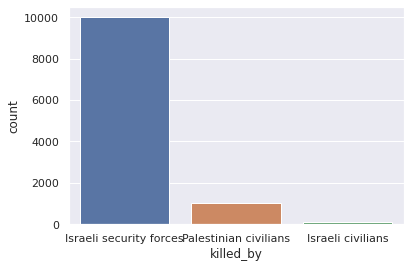

In [56]:
data['killed_by'].unique()
sns.countplot(x='killed_by',data = data)

#### 凶手使用的弹药（区分凶手类型）

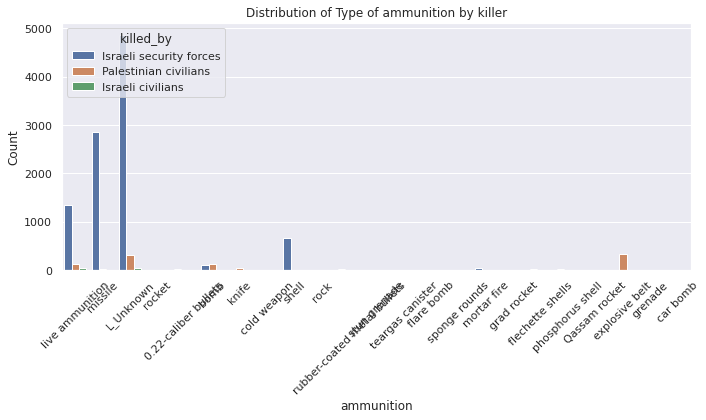

killed_by                    Israeli civilians  Israeli security forces  \
ammunition                                                                
0.22-caliber bullets                         0                       16   
L_Unknown                                   46                     4870   
Qassam rocket                                0                        0   
bomb                                         0                      113   
car bomb                                     0                        2   
cold weapon                                  0                        6   
explosive belt                               0                        0   
flare bomb                                   0                        1   
flechette shells                             0                       22   
grad rocket                                  0                        0   
grenade                                      0                        1   
knife                    

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='ammunition', hue='killed_by', data=data, ax=ax)
ax.set_title('Distribution of Type of ammunition by killer')
ax.set_xlabel('ammunition')
ax.set_ylabel('Count')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='killed_by')

plt.tight_layout()
plt.show()

ammunition_counts = data.groupby(['ammunition', 'killed_by']).size().unstack(fill_value=0)
print(ammunition_counts)

笔者出于一些社会学了解，擅自假定了凶手使用的弹药会因国籍不同而呈现显著的区别。
得出的结论证实了笔者的假设，以色列国防军的导弹（missile）和巴勒斯坦方的卡桑火箭炮（Qassam rocket）均可以看做双方标志性区别的武器。
除去大量的L_Unknown数据，导弹确实是以色列国防军杀伤最高的武器，但巴勒斯坦的卡桑火箭炮在数据集中证实的杀伤数仅为15人。  
假如认定数据集均匀统计（即每个类别均有等比例的代表数据），即不考虑火箭炮（导弹）致死数据难以统计，导致数据集出现偏差的情况下。
可以认为以色列的铁穹防御系统确实有效地防御了中程打击武器，减少了伤亡。
亦或者以色列的导弹确实具有出色的突防能力，相较于火箭弹造成了显著的杀伤。
#### 死者的居住区

<AxesSubplot:xlabel='place_of_residence_district', ylabel='count'>

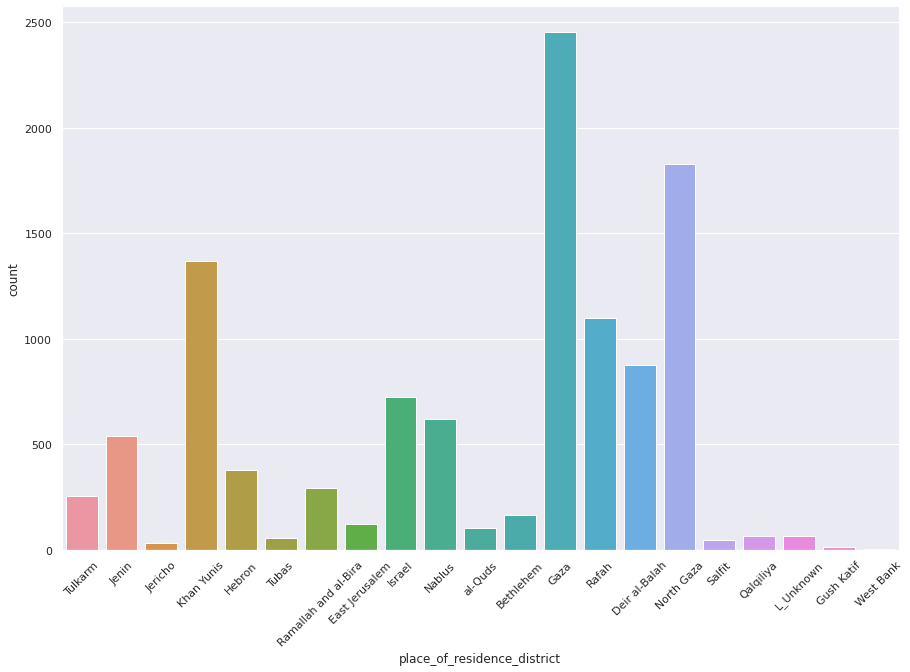

In [58]:
data['place_of_residence_district'].unique()
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.countplot(x= 'place_of_residence_district',data = data)

可以看出，死者明显集中在拉法-加沙一带的海岸南部地区。

In [59]:
# !pip install folium

#### 构建死亡地图
为了更加直观地展示空间分布，笔者通过folium库和查找各个地区的经纬度信息，构建了死难者分布的空间地图。  
巴勒斯坦用红色、以色列用蓝色、美国用绿色、Jordanian用黄色在地图上进行标注

In [60]:
import folium
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286]
}

district_fatalities = data.groupby(['event_location_district', 'citizenship']).size().unstack(fill_value=0)

# 颜色
def get_color(nationality, fatalities):
    if nationality == 'Palestinian':
        color_base = 'red'
    elif nationality == 'Israeli':
        color_base = 'blue'
    elif nationality == 'American':
        color_base = 'green'
    else:
        color_base = 'yellow'
    
    return color_base

m = folium.Map(location=[32, 34.75], zoom_start=8)

for district, coords in district_coords.items():
    for nationality in district_fatalities.columns:
        fatalities = district_fatalities.get(nationality).get(district, 0)
        if fatalities > 0:
            folium.Marker(
                location=coords,
                tooltip=f'District: {district}, Fatalities: {fatalities}, Nationality: {nationality}',
                icon=None
            ).add_to(m)
            folium.Circle(
                location=coords,
                radius=np.sqrt(fatalities) * 1200,
                color=get_color(nationality, fatalities),
                fill=True,
                fill_color=get_color(nationality, fatalities),
                fill_opacity=0.6,
            ).add_to(m)

folium.LayerControl().add_to(m)

m.save('map.html')

from IPython.display import IFrame
IFrame('map.html', width=700, height=500)

## 时间序列分析

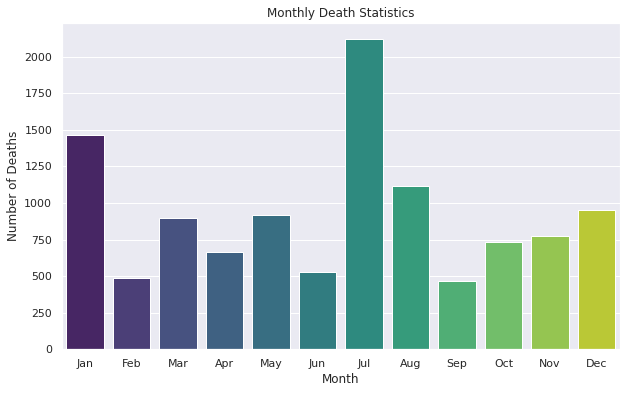

In [61]:
data['date_of_death'] = pd.to_datetime(data['date_of_death'], format='%Y/%m/%d')

data['month'] = data['date_of_death'].dt.month

monthly_deaths = data['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_deaths.index, y=monthly_deaths.values, palette='viridis')
plt.title('Monthly Death Statistics')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

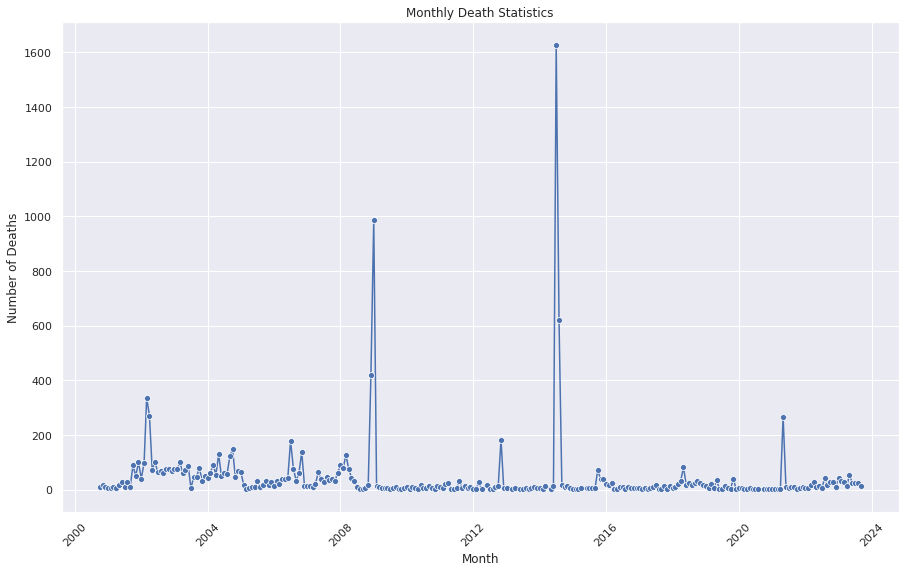

In [62]:
data['date_of_death'] = pd.to_datetime(data['date_of_death'], format='%Y/%m/%d')

data['year_month'] = data['date_of_death'].dt.to_period('M')

monthly_deaths = data['year_month'].value_counts().sort_index()

monthly_deaths.index = monthly_deaths.index.to_timestamp()

plt.figure(figsize=(15, 9))
sns.lineplot(x=monthly_deaths.index, y=monthly_deaths.values, marker='o')
plt.title('Monthly Death Statistics')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

笔者观察上述月份折线图，暂时没有找到合适的拟合曲线。

可以看出死亡者分布的时间规律  
从2000年到2010年这一阶段，巴勒斯坦的抵抗力量还比较强的时候，双方的冲突比较激烈。

从2010年到2020年，月常的死亡人数有所下降。几个显著的折线凸起，对应着以色列的几次军事行动。

从2020年到2023年9月，以色列的一次军事行动对应着死亡人数的一个高峰，除此之外，约从2022年开始到2023年9月，折线的低矮部分有了比较明显的震荡，笔者认为这是巴勒斯坦对以色列矛盾加深，直至2023年10月爆发大规模冲突的先声。

**几个凸峰可能对应的以色列军事行动：**
- 防御盾牌行动(2002)
- 铸铅行动 (2008-2009)
- 云柱行动 (2012)
- 保护边缘行动 (2014)
- 守护者行动 (2021)

### 观察死亡人数月份分布（取平均值）

Average Monthly Deaths (excluding months with >200 deaths): 927.0


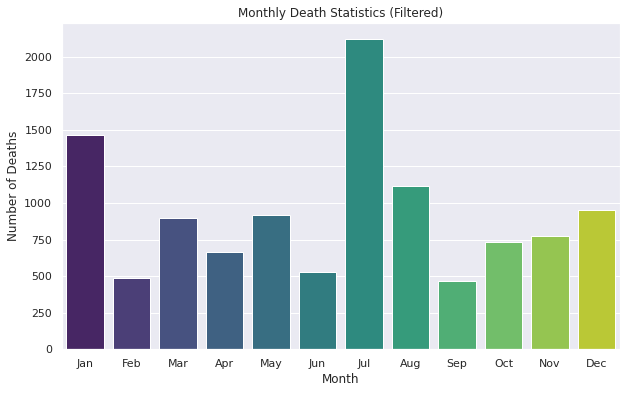

In [63]:

data['date_of_death'] = pd.to_datetime(data['date_of_death'], format='%Y/%m/%d')

data['month'] = data['date_of_death'].dt.month

# 每个月死亡人数
monthly_deaths = data['month'].value_counts().sort_index()

# 平均每月死亡人数
average_monthly_deaths = monthly_deaths.mean()
print(f'Average Monthly Deaths (excluding months with >200 deaths): {average_monthly_deaths}')

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_deaths.index, y=monthly_deaths.values, palette='viridis')
plt.title('Monthly Death Statistics (Filtered)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(ticks=monthly_deaths.index-1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


### 对死难者聚类
先剔除姓名、备注、年月等无关数据和为了绘制图表中间生成的数据，观察用来聚类的数据

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import paddle
from paddle import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = data.drop(columns=['notes', 'name', 'year_month'])

data.head().T

0  \
date_of_event                              2023-09-24   
age                                              32.0   
citizenship                               Palestinian   
event_location                         Nur Shams R.C.   
event_location_district                       Tulkarm   
event_location_region                       West Bank   
date_of_death                     2023-09-24 00:00:00   
gender                                              M   
took_part_in_the_hostilities                L_Unknown   
place_of_residence                     Nur Shams R.C.   
place_of_residence_district                   Tulkarm   
type_of_injury                                gunfire   
ammunition                            live ammunition   
killed_by                     Israeli security forces   
month                                               9   

                                                    1  \
date_of_event                              2023-09-24   
age                                              21.0   
citizenship                               Palestinian   
event_location                         Nur Shams R.C.   
event_location_district                       Tulkarm   
event_location_region                       West Bank   
date_of_death                     2023-09-24 00:00:00   
gender                                              M   
took_part_in_the_hostilities                L_Unknown   
place_of_residence                     Nur Shams R.C.   
place_of_residence_district                   Tulkarm   
type_of_injury                                gunfire   
ammunition                            live ammunition   
killed_by                     Israeli security forces   
month                                               9   

                                                    2  \
date_of_event                              2023-09-22   
age                                              16.0   
citizenship                               Palestinian   
event_location                               Kfar Dan   
event_location_district                         Jenin   
event_location_region                       West Bank   
date_of_death                     2023-09-22 00:00:00   
gender                                              M   
took_part_in_the_hostilities                L_Unknown   
place_of_residence                           al-Yamun   
place_of_residence_district                     Jenin   
type_of_injury                                gunfire   
ammunition                            live ammunition   
killed_by                     Israeli security forces   
month                                               9   

                                                    3                        4  
date_of_event                              2023-09-20               2023-09-19  
age                                              19.0                     15.0  
citizenship                               Palestinian              Palestinian  
event_location                      'Aqbat Jaber R.C.               Jenin R.C.  
event_location_district                       Jericho                    Jenin  
event_location_region                       West Bank                West Bank  
date_of_death                     2023-09-20 00:00:00      2023-09-19 00:00:00  
gender                                              M                        M  
took_part_in_the_hostilities                L_Unknown                L_Unknown  
place_of_residence                  'Aqbat Jaber R.C.                    Jenin  
place_of_residence_district                   Jericho                    Jenin  
type_of_injury                                gunfire                  gunfire  
ammunition                            live ammunition          live ammunition  
killed_by                     Israeli security forces  Israeli security forces  
month                                               9                        9

- 采用简单的DBSCAN方法来完成聚类，由于paddle中没有内置的DBSCAN方法，因此需要独立实现。
- 使用原始数据完成DBSCAN聚类时发现效果很差，模型将绝大部分点都识别为噪声点，因此使用PCA先对数据进行预处理，降维至2维以后得到了稍好的结果。
- 表格中有大量的非数值属性，对于这些属性，我决定如果属性包含的种类多的话就采用标签的方式编码，如ammunition等；对于类别少且明显不应该使用标签编码的数据（如citizenship等），采用one hot编码。
- 具体步骤如下流程图：

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/h8WJnZH/DBSCAN.png" width="1000px"/></div>
</div>


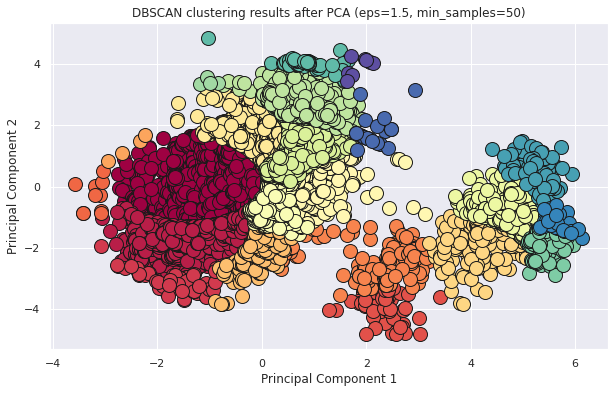

In [65]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import paddle
from sklearn.decomposition import PCA
import pickle
# 复制数据
processed_data = data.copy()

# 日期映射数字
def date_to_number(date_str, format_str):
    if pd.isnull(date_str):
        return np.nan
    if isinstance(date_str, (int, float)):
        return date_str
    return datetime.strptime(str(date_str), format_str).timestamp()

processed_data['date_of_event'] = processed_data['date_of_event'].apply(lambda x: date_to_number(x, '%Y-%m-%d'))
processed_data['date_of_death'] = processed_data['date_of_death'].apply(lambda x: date_to_number(x, '%Y-%m-%d %H:%M:%S'))

def encode_categorical(df):
    encoders = {}
    mapping_dict = {}
    for column in df.select_dtypes(include=['object']).columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        mapping_dict[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        encoders[column] = encoder
    return df, encoders, mapping_dict

processed_data, encoders, mapping_dict = encode_categorical(processed_data)

# 标准化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(processed_data)

# PCA
pca = PCA(n_components=2)  # 降维到2维
data_pca = pca.fit_transform(data_scaled)

# DBSCAN
def paddle_dbscan(data, eps, min_samples):
    n_points = data.shape[0]
    labels = -paddle.ones((n_points,), dtype='int32')
    C = 0
    
    for i in range(n_points):
        if labels[i] != -1:
            continue
        
        neighbors = region_query(data, i, eps)
        
        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            C += 1
            grow_cluster(data, labels, i, neighbors, C, eps, min_samples)
    
    return labels.numpy()

def region_query(data, point_idx, eps):
    distances = paddle.sqrt(paddle.sum((data - data[point_idx]) ** 2, axis=1))
    return paddle.nonzero(distances <= eps).flatten().numpy().tolist()

def grow_cluster(data, labels, point_idx, neighbors, C, eps, min_samples):
    labels[point_idx] = C
    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]
        
        if labels[neighbor] == -1:
            labels[neighbor] = C
        elif labels[neighbor] == -1:
            labels[neighbor] = C
            new_neighbors = region_query(data, neighbor, eps)
            if len(new_neighbors) >= min_samples:
                neighbors = neighbors + new_neighbors
        
        i += 1

data_pca_tensor = paddle.to_tensor(data_pca, dtype='float32')
eps = 1.5
min_samples = 50
labels = paddle_dbscan(data_pca_tensor, eps=eps, min_samples=min_samples)

processed_data['cluster'] = labels

plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = data_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

plt.title(f'DBSCAN clustering results after PCA (eps={eps}, min_samples={min_samples})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 保存模型
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)
with open('mapping_dict.pkl', 'wb') as f:
    pickle.dump(mapping_dict, f)

聚类完成后，分别保存标准化数据、PCA数据、编码器和映射字典到对应的pickle文件中。
#### 查看聚类结果

In [66]:
processed_data['cluster'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int32)

统计每个类别的数量，绘制类别占比的饼状图

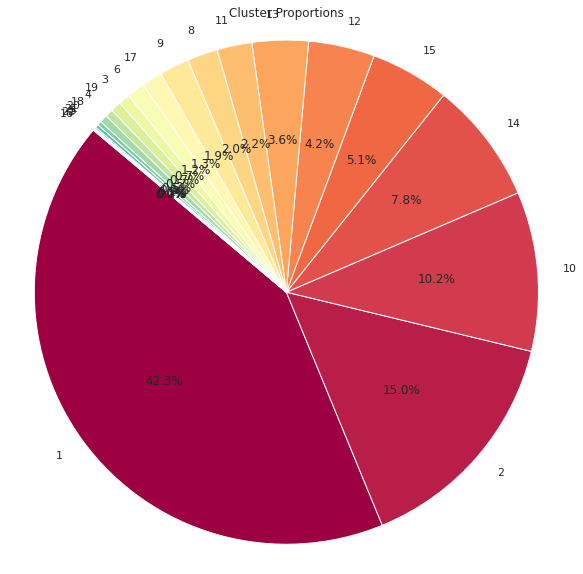

In [67]:
cluster_counts = processed_data['cluster'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Spectral(np.linspace(0, 1, len(cluster_counts))))
plt.title('Cluster Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

获取PCA组件的特征向量（解释方差），计算每个特征的重要性（贡献率），绘制属性重要性的饼状图。

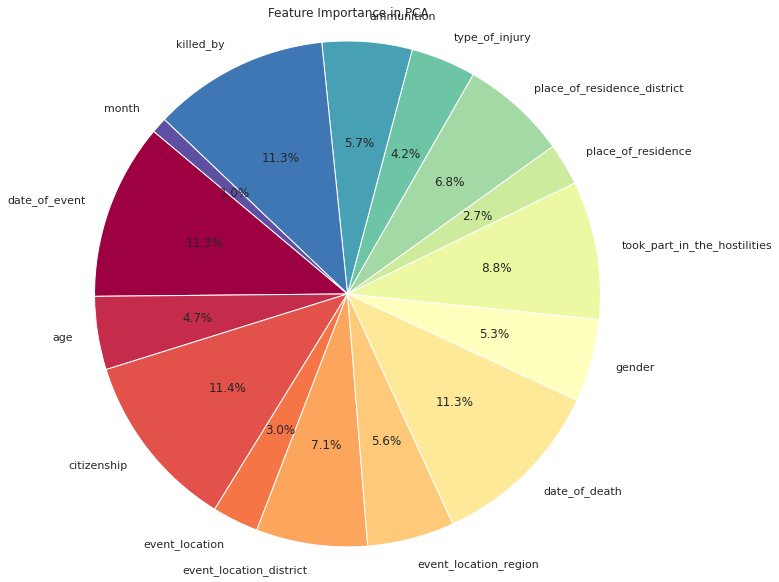

In [68]:
pca_components = pca.components_

feature_importance = np.abs(pca_components).sum(axis=0)
feature_importance = feature_importance / feature_importance.sum()

plt.figure(figsize=(10, 10))
plt.pie(feature_importance, labels=processed_data.columns[:-1], autopct='%1.1f%%', startangle=140, colors=plt.cm.Spectral(np.linspace(0, 1, len(feature_importance))))
plt.title('Feature Importance in PCA')
plt.axis('equal')
plt.show()

#### 对死亡数最多的前三类死难者做进一步观察
##### 死亡事件发生的地区

/tmp/ipykernel_2079/2618116728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['event_location_region'] = filtered_data['event_location_region'].map(inverse_mapping)


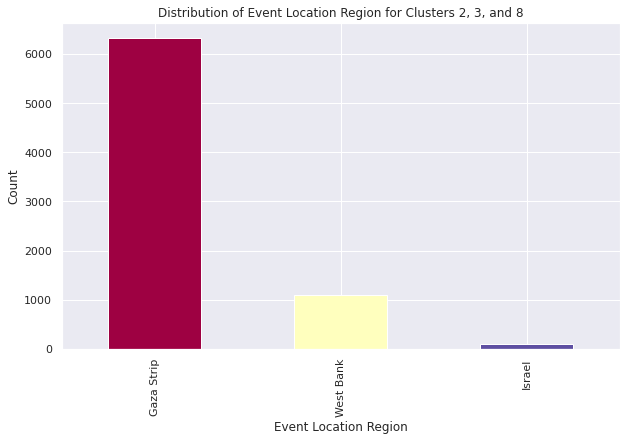

In [69]:
filtered_data = processed_data[processed_data['cluster'].isin([1, 2, 10])]

# event_location_region映射回原始值
inverse_mapping = {v: k for k, v in mapping_dict['event_location_region'].items()}
filtered_data['event_location_region'] = filtered_data['event_location_region'].map(inverse_mapping)

# event_location_region分布
region_counts = filtered_data['event_location_region'].value_counts()

plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color=plt.cm.Spectral(np.linspace(0, 1, len(region_counts))))
plt.title('Distribution of Event Location Region for Clusters 2, 3, and 8')
plt.xlabel('Event Location Region')
plt.ylabel('Count')
plt.show()

#### 死亡者的国籍分布

/tmp/ipykernel_2079/3786291085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_citizenship['citizenship'] = filtered_data_citizenship['citizenship'].map(inverse_mapping_citizenship)


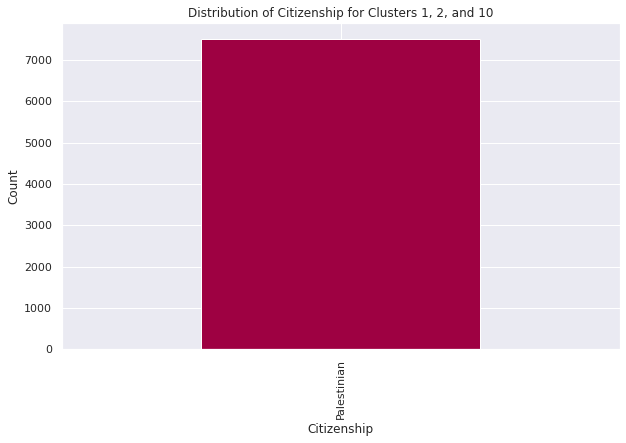

In [70]:
filtered_data_citizenship = processed_data[processed_data['cluster'].isin([1, 2, 10])]

inverse_mapping_citizenship = {v: k for k, v in mapping_dict['citizenship'].items()}
filtered_data_citizenship['citizenship'] = filtered_data_citizenship['citizenship'].map(inverse_mapping_citizenship)

citizenship_counts = filtered_data_citizenship['citizenship'].value_counts()

plt.figure(figsize=(10, 6))
citizenship_counts.plot(kind='bar', color=plt.cm.Spectral(np.linspace(0, 1, len(citizenship_counts))))
plt.title('Distribution of Citizenship for Clusters 1, 2, and 10')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.show()

##### 死难者分类后死亡数最多的前三类全部为巴勒斯坦籍。
##### 结果既让人意外又在情理之中：毕竟在我们的统计数据中，巴勒斯坦的死难者几乎是以色列死难者的10倍，而这两个国籍之外的其他死难者的统计人数相较而言非常非常少。
##### 在绝大部分死难者都为巴勒斯坦籍的情况下，分类死难者后统计前三大类（也是所有占比超10%的类）得到这样一致的国籍分布结果也就说得通了。
#### 死亡者的年龄分布

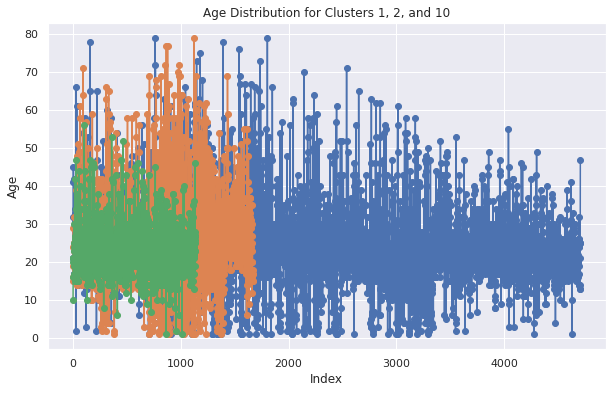

In [71]:
# 1、2、10中的age
filtered_data_age = processed_data[processed_data['cluster'].isin([1, 2, 10])]

plt.figure(figsize=(10, 6))
for cluster in [1, 2, 10]:
    cluster_data = filtered_data_age[filtered_data_age['cluster'] == cluster]
    plt.plot(cluster_data['age'].values, marker='o', label=f'Cluster {cluster}')
plt.title('Age Distribution for Clusters 1, 2, and 10')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

##### 可以看出，这三类死难者死亡时的年龄绝大部分集中在15-40岁之间。同时存在大量的10岁以下的儿童（幼儿）死者。


---


#### 凶手分布

/tmp/ipykernel_2079/630633584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_killed_by['killed_by'] = filtered_data_killed_by['killed_by'].map(inverse_mapping_killed_by)


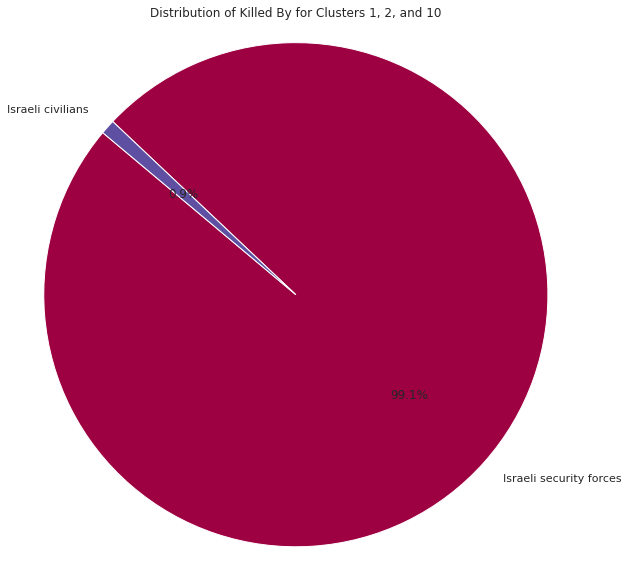

In [72]:
filtered_data_killed_by = processed_data[processed_data['cluster'].isin([1, 2, 10])]

inverse_mapping_killed_by = {v: k for k, v in mapping_dict['killed_by'].items()}
filtered_data_killed_by['killed_by'] = filtered_data_killed_by['killed_by'].map(inverse_mapping_killed_by)

killed_by_counts = filtered_data_killed_by['killed_by'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(killed_by_counts, labels=killed_by_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Spectral(np.linspace(0, 1, len(killed_by_counts))))
plt.title('Distribution of Killed By for Clusters 1, 2, and 10')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 上述三类死难者中，99.1%都死于以色列国防军之手，剩下的0.9%死于（普通）以色列人之手
##### 不止是上述三类死难者，在所有统计的数据中，几乎没有巴勒斯坦人死于相同国籍的人（武装力量）之手，笔者无法留到最后，暂时先在此处宕开一笔，所谓的“恐怖袭击”数据集，笔者认为或许更多反映的是民族矛盾、信仰矛盾，把任何一方民族或民族武装草率地定义为恐怖主义，都是对另一方的偏袒，不利于和平的达成。


---

#### 死因（受伤原因）分布

/tmp/ipykernel_2079/3559471959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_injury['type_of_injury'] = filtered_data_injury['type_of_injury'].map(inverse_mapping_injury)


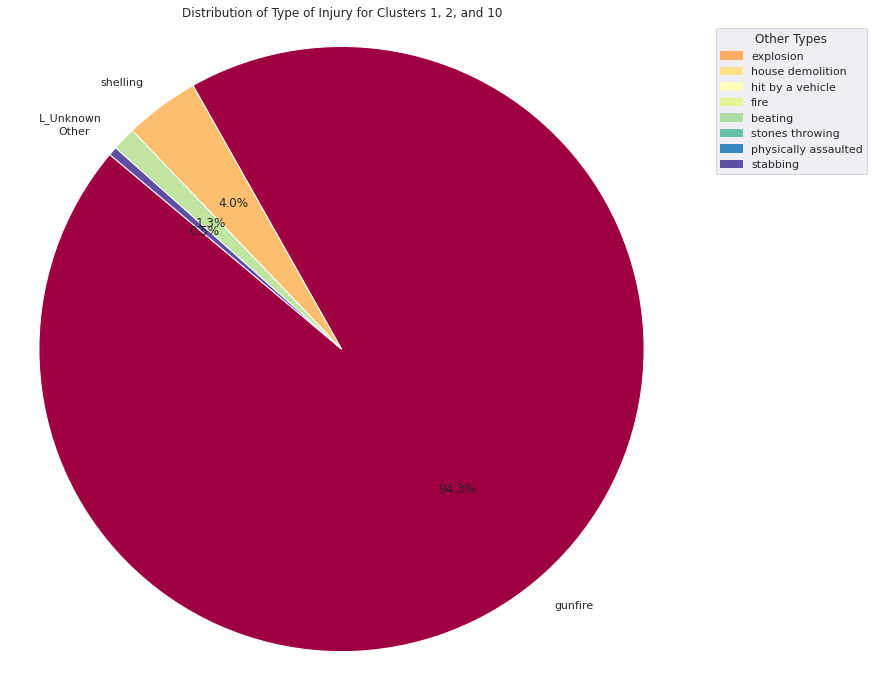

In [73]:
import matplotlib.patches as mpatches

filtered_data_injury = processed_data[processed_data['cluster'].isin([1, 2, 10])]

inverse_mapping_injury = {v: k for k, v in mapping_dict['type_of_injury'].items()}
filtered_data_injury['type_of_injury'] = filtered_data_injury['type_of_injury'].map(inverse_mapping_injury)

injury_counts = filtered_data_injury['type_of_injury'].value_counts()

top3_injuries = injury_counts.head(3)
other_injuries = injury_counts.iloc[3:].sum()

plot_data = top3_injuries.append(pd.Series({'Other': other_injuries}))

plt.figure(figsize=(12, 12))
colors = plt.cm.Spectral(np.linspace(0, 1, len(plot_data)))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Type of Injury for Clusters 1, 2, and 10')
plt.axis('equal')

other_labels = injury_counts.index[3:]
other_colors = plt.cm.Spectral(np.linspace(0, 1, len(injury_counts)))[3:]
patches = [mpatches.Patch(color=color, label=label) for label, color in zip(other_labels, other_colors)]
plt.legend(handles=patches, title='Other Types', bbox_to_anchor=(1.05, 1), loc='best')

plt.show()

##### 绝大部分（94.3%）的死者死于枪击，其余小部分（4.0%）死于炮击，剩下的死者死于其他攻击方式（或未取得标记的原因）


---

## 通过notes对死难者画像
##### 数据集中的notes属性，记录了死难者的一部分信息，笔者尝试运用一部分NLP的知识来对notes进行有监督学习。
先观察notes中各个类别的词云图和各类别死者的主要国籍。

In [74]:
data = pd.read_csv('/home/jovyan/work/项目1-实训案例内容开发/fatalities_isr_pse_conflict_2000_to_2023.csv')
data['cluster']=processed_data['cluster']


In [75]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def extract_words(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words and word not in punctuation]
    return words

data['words'] = data['notes'].apply(lambda x: extract_words(str(x)))


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


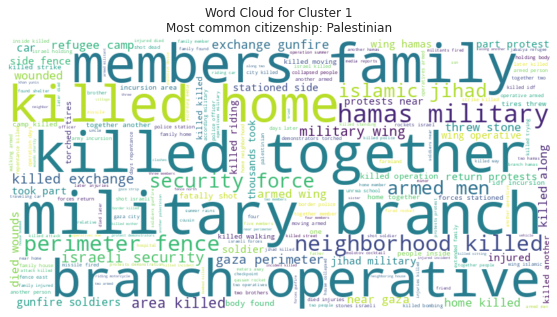

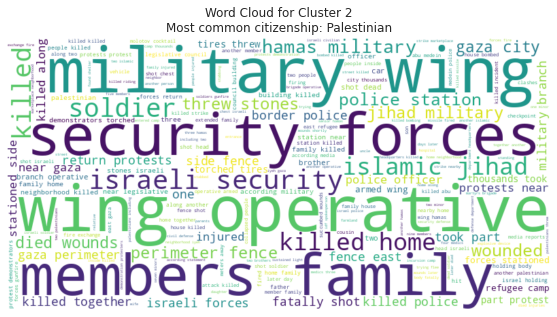

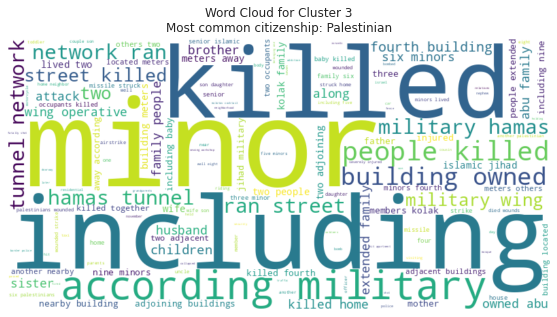

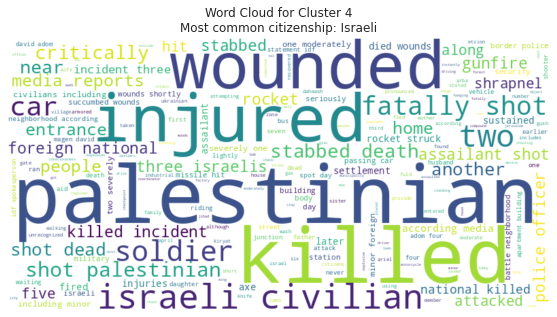

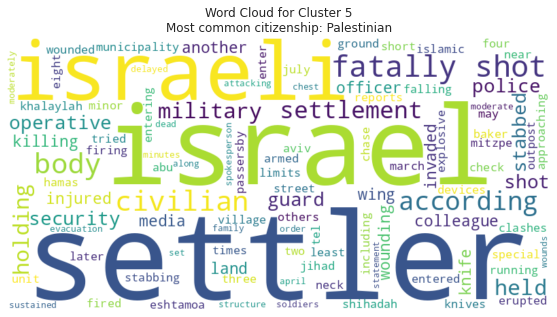

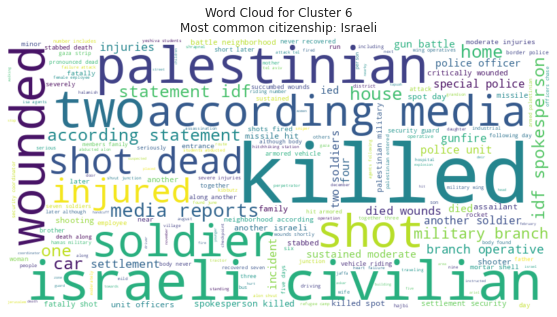

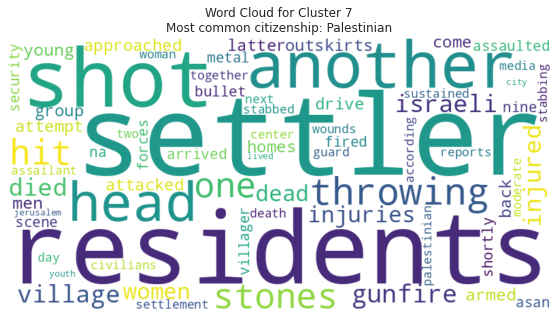

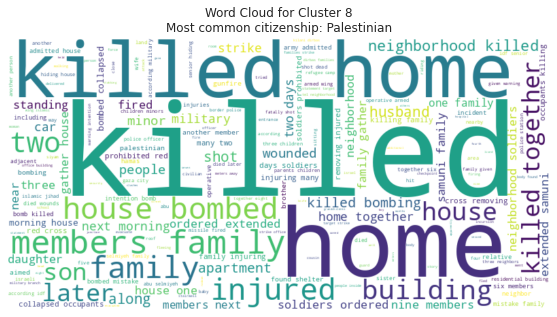

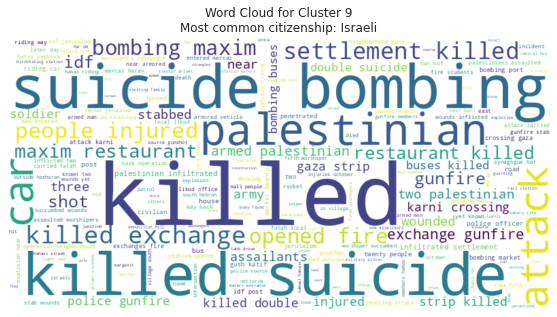

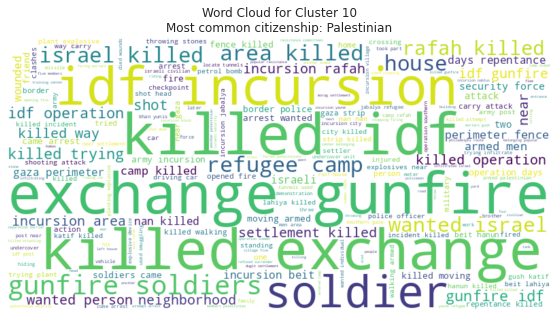

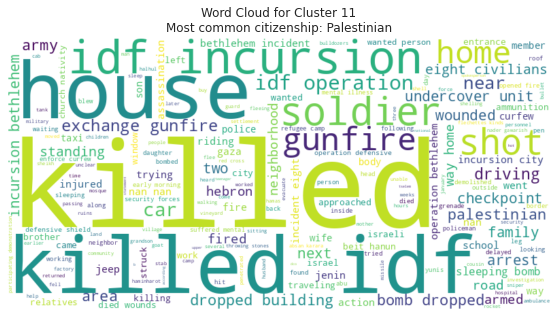

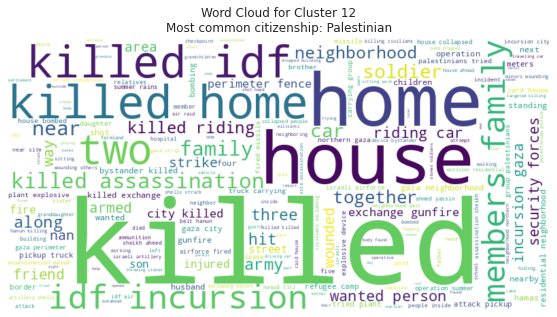

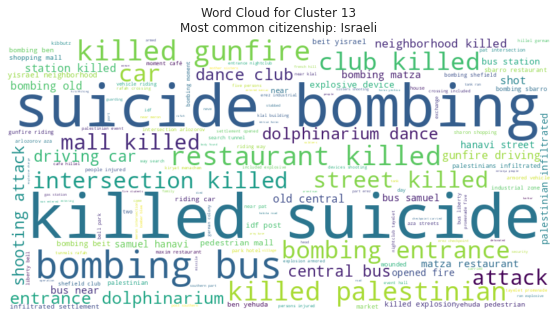

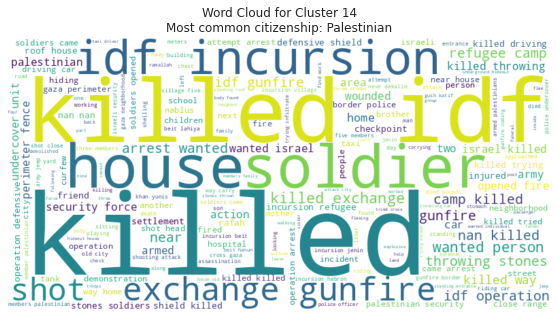

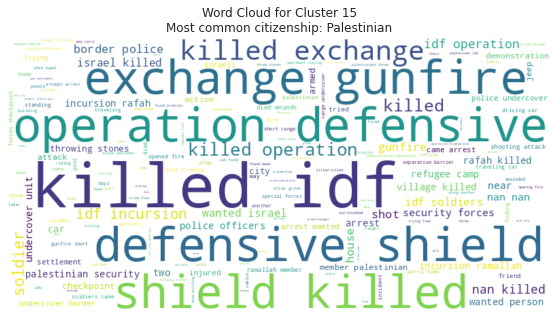

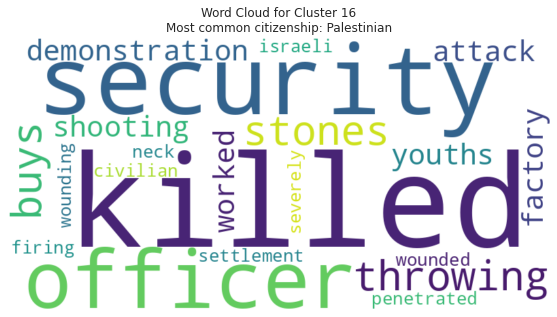

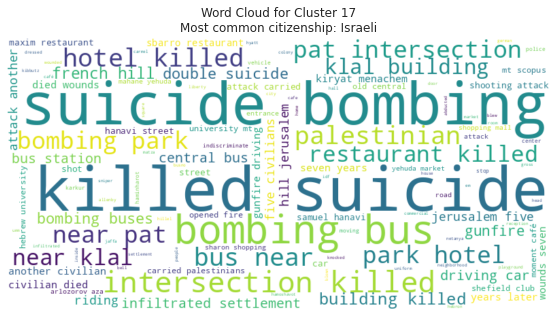

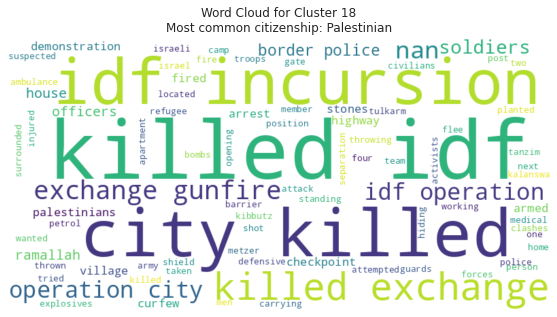

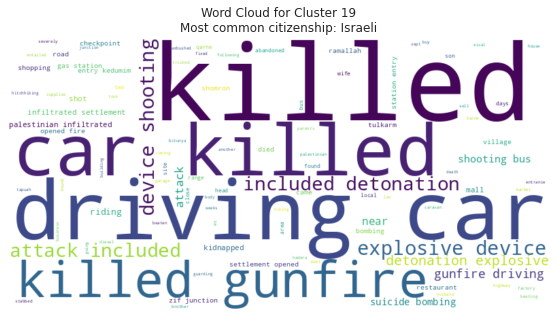

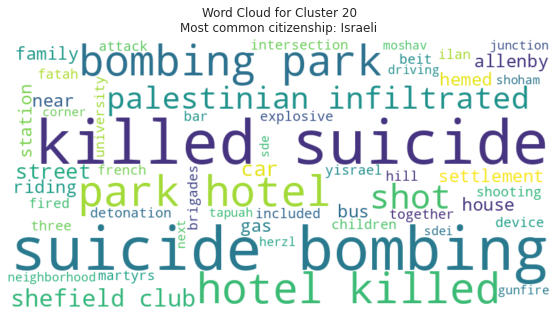

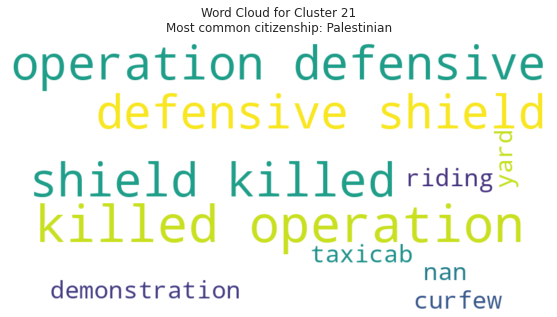

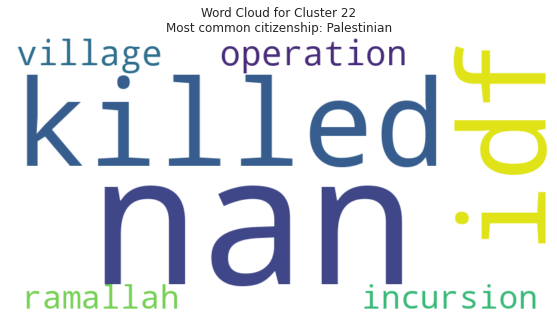

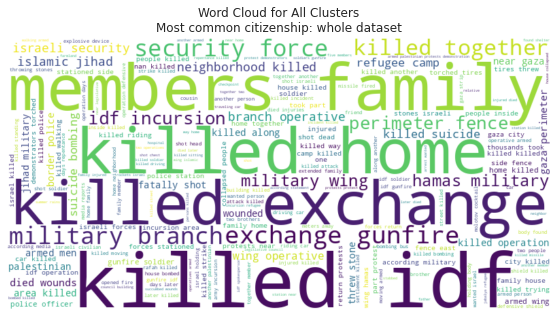

Top 10 words: [('killed', 10657), ('home', 1981), ('family', 1826), ('soldiers', 1620), ('military', 1612), ('two', 1545), ('shot', 1426), ('idf', 1312), ('near', 1296), ('house', 1270)]


In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def get_top_words(words, n=10):
    counter = Counter(words)
    return counter.most_common(n)

def generate_wordcloud(words, title, citizenship_value):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{title}\nMost common citizenship: {citizenship_value}')
    plt.axis('off')
    plt.show()

def get_most_common_citizenship(cluster):
    cluster_data = data[data['cluster'] == cluster]
    return cluster_data['citizenship'].mode().iloc[0]

all_words = []
for cluster in data['cluster'].unique():
    cluster_words = data[data['cluster'] == cluster]['words'].sum()
    all_words.extend(cluster_words)
    most_common_citizenship = get_most_common_citizenship(cluster)
    generate_wordcloud(cluster_words, f'Word Cloud for Cluster {cluster}', most_common_citizenship)

generate_wordcloud(all_words, 'Word Cloud for All Clusters', "whole dataset")

# 前十高频词
top_words = get_top_words(all_words)
print("Top 10 words:", top_words)

##### 提取死难者的notes信息，观察通过notes能否对应到相应的死者聚类
**具体方法如下：**
- 综合考虑实现难度和加分的因素，笔者选用的机器学习框架是**paddlepaddle**。
- 通过读取notes的原始文本信息和上述聚类得到的分类标号，区分训练集（70%）、验证集（20%）和测试集（10%），采用类似于情感分析的方法，观察NLP模型能否仅通过notes属性，完成对死难者的分类。
- 为了解决部分类别样本数量过少的问题，笔者采用**Smote方法扩充训练集样本**。同时为了确保使用SMOTE扩充的数据量适中，我选择指定每个类别的样本数达到一定的最小值，而不是平衡所有类别。
- 由于SMOTE算法中的 k_neighbors 参数设置超过了一些少数类的样本数。在实现SMOTE算法时，笔者动态调整了k_neighbors参数，以此确保k_neighbors不会超过当前类样本数。
- 笔者通过ChatGPT和查询相关资料，选择采用的方法是先通过**TF-IDF方法**将文本转换为特征向量，再分别通过**逻辑回归**和**LSTM**模型完成词向量的分类，得到最后的分类结果。
- 观察到LSTM模型获得的效果不好，考虑到LSTM处理TF-IDF得到的特征向量的方式可能并不适配，通过构建词表，采用**词表+LSTM**的方式来完成分类，观察得到的分类效果。

##### notes中空数据笔者采用空字符串来替代，之所以没有使用别的方式完成填充，主要是基于这个考量：空数据未必就是无用的或者待填充的信息，在某种程度上说，空数据的“内容为空”，本身就是分类的一个依据。

### TF-IDF+逻辑回归
TF-TDF+逻辑回归的流程图如下：

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/z4kxbJv/logistic.png" width="1000px"/></div>
</div>

逻辑回归的结构图非常简单，为单层的input_dim个神经元数量的神经网络，概念图如下：

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/qpJ29mp/logistics.png" width="1000px"/></div>
</div>


In [77]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import paddle
from paddle.nn import Linear
from paddle.optimizer import Adam
from paddle.io import Dataset, DataLoader
from sklearn.neighbors import NearestNeighbors

data = data[data['cluster'] != -1]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data['notes'] = data['notes'].fillna('').apply(preprocess_text)

unique_clusters = data['cluster'].unique()
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted(unique_clusters))}
data['cluster'] = data['cluster'].map(cluster_mapping)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['notes']).toarray()
y = data['cluster'].values

def smote(X, y, minority_class, N=5, k=5):
    minority_samples = X[y == minority_class]
    n_minority_samples = len(minority_samples)
    k = min(k, n_minority_samples - 1)
    if k < 1:
        return np.array([])

    nbrs = NearestNeighbors(n_neighbors=k).fit(minority_samples)
    synthetic_samples = []
    for _ in range(N):
        i = np.random.randint(0, n_minority_samples)
        nn = nbrs.kneighbors([minority_samples[i]], return_distance=False).flatten()
        nn_index = nn[np.random.randint(1, k)]
        diff = minority_samples[nn_index] - minority_samples[i]
        gap = np.random.rand()
        synthetic_samples.append(minority_samples[i] + gap * diff)
    return np.array(synthetic_samples)

min_samples_per_class = 20
class_counts = pd.Series(y).value_counts()
X_resampled = []
y_resampled = []

for cls in class_counts.index:
    cls_samples = X[y == cls]
    num_samples = len(cls_samples)
    if num_samples < min_samples_per_class:
        num_to_add = min_samples_per_class - num_samples
        synthetic_samples = smote(X, y, cls, N=num_to_add, k=5)
        if len(synthetic_samples) > 0:
            X_resampled.append(np.vstack((cls_samples, synthetic_samples)))
            y_resampled.extend([cls] * (num_samples + num_to_add))
        else:
            X_resampled.append(cls_samples)
            y_resampled.extend([cls] * num_samples)
    else:
        X_resampled.append(cls_samples)
        y_resampled.extend([cls] * num_samples)

X_resampled = np.vstack(X_resampled)
y_resampled = np.array(y_resampled)

num_classes = len(np.unique(y_resampled))
print(f'Number of classes: {num_classes}')
print(f'Classes: {np.unique(y_resampled)}')

assert y_resampled.max() < num_classes, "Error: Some labels are out of range."

train_data, temp_data, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
val_data, test_data, y_val, y_test = train_test_split(temp_data, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(train_data, y_train)
val_dataset = TextDataset(val_data, y_val)
test_dataset = TextDataset(test_data, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TextClassificationModel(paddle.nn.Layer):
    def __init__(self, input_dim, num_classes):
        super(TextClassificationModel, self).__init__()
        self.fc = Linear(input_dim, num_classes)
    
    def forward(self, x):
        return self.fc(x)

input_dim = X_resampled.shape[1]
model = TextClassificationModel(input_dim, num_classes)
optimizer = Adam(learning_rate=0.001, parameters=model.parameters())
criterion = paddle.nn.CrossEntropyLoss()

def train(model, optimizer, criterion, train_loader, val_loader, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            X_batch, y_batch = batch
            X_batch = paddle.to_tensor(X_batch, dtype='float32')
            y_batch = paddle.to_tensor(y_batch, dtype='int64')
            
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            
            loss.backward()
            optimizer.step()
            optimizer.clear_grad()
        
        model.eval()
        val_loss = 0.0
        val_acc = 0.0
        with paddle.no_grad():
            for batch in val_loader:
                X_batch, y_batch = batch
                X_batch = paddle.to_tensor(X_batch, dtype='float32')
                y_batch = paddle.to_tensor(y_batch, dtype='int64')
                
                logits = model(X_batch)
                loss = criterion(logits, y_batch)
                
                val_loss += loss.numpy().item()
                val_acc += paddle.metric.accuracy(logits, y_batch.unsqueeze(1)).numpy().item()
        
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.numpy().item():.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

train(model, optimizer, criterion, train_loader, val_loader, num_epochs=65)

def evaluate(model, test_loader):
    model.eval()
    test_acc = 0.0
    y_true = []
    y_pred = []
    with paddle.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            X_batch = paddle.to_tensor(X_batch, dtype='float32')
            y_batch = paddle.to_tensor(y_batch, dtype='int64')
            
            logits = model(X_batch)
            test_acc += paddle.metric.accuracy(logits, y_batch.unsqueeze(1)).numpy().item()
            
            y_true.extend(y_batch.numpy())
            y_pred.extend(logits.argmax(axis=1).numpy())
    
    test_acc /= len(test_loader)
    print(f'Test Accuracy: {test_acc:.4f}')
    print(classification_report(y_true, y_pred))

evaluate(model, test_loader)

paddle.save(model.state_dict(), 'logistic_model.pdparams')

Number of classes: 22
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Epoch 1/65, Loss: 2.2700, Val Loss: 2.4102, Val Acc: 0.4224
Epoch 2/65, Loss: 1.8170, Val Loss: 2.0327, Val Acc: 0.4312
Epoch 3/65, Loss: 1.5912, Val Loss: 1.8396, Val Acc: 0.4374
Epoch 4/65, Loss: 1.4705, Val Loss: 1.7276, Val Acc: 0.4477
Epoch 5/65, Loss: 1.4010, Val Loss: 1.6510, Val Acc: 0.4640
Epoch 6/65, Loss: 1.3563, Val Loss: 1.5925, Val Acc: 0.4764
Epoch 7/65, Loss: 1.3254, Val Loss: 1.5452, Val Acc: 0.4918
Epoch 8/65, Loss: 1.3032, Val Loss: 1.5058, Val Acc: 0.5063
Epoch 9/65, Loss: 1.2802, Val Loss: 1.4718, Val Acc: 0.5204
Epoch 10/65, Loss: 1.2634, Val Loss: 1.4425, Val Acc: 0.5252
Epoch 11/65, Loss: 1.2463, Val Loss: 1.4168, Val Acc: 0.5283
Epoch 12/65, Loss: 1.2307, Val Loss: 1.3940, Val Acc: 0.5367
Epoch 13/65, Loss: 1.2146, Val Loss: 1.3734, Val Acc: 0.5433
Epoch 14/65, Loss: 1.2018, Val Loss: 1.3550, Val Acc: 0.5477
Epoch 15/65, Loss: 1.1889, Val Loss: 1.3382, Val Acc: 0.

/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 可以看出，逻辑回归模型在50个epoch左右性能就已经比较稳定，验证集的准确率大概在60%~61%左右，测试集的准确率大概在60%左右（笔者尝试过100个epoch，测试集的准确率也没有下降，大概模型准确率稳定在60%附近）
##### 但这并不能全面反映模型的性能，尤其是这个问题中，聚类后得到的分类是严重不平衡的。
##### 从上述数据便可以看出，不同类别的精确率、召回率和 F1 分数差异很大：类别 0、2、4、13类的 F1 分数较高，但这些类别的样本数很少（support值）。7类的样本数最多（113），精确率、召回率和 F1 分数都较为平衡，模型在这个类上的表现中规中矩。8、17、18、19类的 F1 分数较低，模型在这些类别上基本没有正确分类。
##### 宏平均 F1 分数为 0.48，模型在各个样本上的平均表现较差。加权平均 F1 分数为 0.58，即模型在样本较多的类上表现明显好些，但整体性能仍比较一般。

### TF-IDF+LSTM
TF-TDF+LSTM的流程图如下：

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/Fs2jzSp/LSTM.png" width="1000px"/></div>
</div>

LSTM+全连接层的流程图如下：


<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/HXsWXXr/LSTM2.png" width="1000px"/></div>
</div>


由于分类文本较短，采用单层LSTM网络结构，128个LSTM神经元。

LSTM单神经元的结构图如下：（图源为[img](https://pics.latexstudio.net/uploads/20210624/60d3d3e1bdb90/latexc__images/1.png)）

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/qR6yG4C/lstm.png" width="1000px"/></div>
</div>


In [79]:
from paddle.nn import LSTM

class LSTMClassificationModel(paddle.nn.Layer):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(LSTMClassificationModel, self).__init__()
        self.lstm = LSTM(input_dim, hidden_dim, direction='bidirectional')
        self.fc = Linear(hidden_dim * 2, num_classes)
    
    def forward(self, x):
        x = paddle.unsqueeze(x, axis=1)
        x, (h, c) = self.lstm(x)
        x = paddle.flatten(x, start_axis=1)
        return self.fc(x)

input_dim = X_resampled.shape[1]
hidden_dim = 128
model = LSTMClassificationModel(input_dim, hidden_dim, num_classes)
optimizer = Adam(learning_rate=0.001, parameters=model.parameters())
criterion = paddle.nn.CrossEntropyLoss()

def train(model, optimizer, criterion, train_loader, val_loader, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            X_batch, y_batch = batch
            X_batch = paddle.to_tensor(X_batch, dtype='float32')
            y_batch = paddle.to_tensor(y_batch, dtype='int64')
            
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            
            loss.backward()
            optimizer.step()
            optimizer.clear_grad()
        
        model.eval()
        val_loss = 0.0
        val_acc = 0.0
        with paddle.no_grad():
            for batch in val_loader:
                X_batch, y_batch = batch
                X_batch = paddle.to_tensor(X_batch, dtype='float32')
                y_batch = paddle.to_tensor(y_batch, dtype='int64')
                
                logits = model(X_batch)
                loss = criterion(logits, y_batch)
                
                val_loss += loss.numpy().item()
                val_acc += paddle.metric.accuracy(logits, y_batch.unsqueeze(1)).numpy().item()
        
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.numpy().item():.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

train(model, optimizer, criterion, train_loader, val_loader, num_epochs=30)

def evaluate(model, test_loader):
    model.eval()
    test_acc = 0.0
    y_true = []
    y_pred = []
    with paddle.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            X_batch = paddle.to_tensor(X_batch, dtype='float32')
            y_batch = paddle.to_tensor(y_batch, dtype='int64')
            
            logits = model(X_batch)
            test_acc += paddle.metric.accuracy(logits, y_batch.unsqueeze(1)).numpy().item()
            
            y_true.extend(y_batch.numpy())
            y_pred.extend(logits.argmax(axis=1).numpy())
    
    test_acc /= len(test_loader)
    print(f'Test Accuracy: {test_acc:.4f}')
    print(classification_report(y_true, y_pred))

evaluate(model, test_loader)

paddle.save(model.state_dict(), 'LSTM_model.pdparams')


Number of classes: 22
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Epoch 1/30, Loss: 1.3629, Val Loss: 1.5454, Val Acc: 0.5050
Epoch 2/30, Loss: 1.1692, Val Loss: 1.2868, Val Acc: 0.5661
Epoch 3/30, Loss: 0.9403, Val Loss: 1.1939, Val Acc: 0.5963
Epoch 4/30, Loss: 0.8205, Val Loss: 1.1682, Val Acc: 0.6031
Epoch 5/30, Loss: 0.7136, Val Loss: 1.1727, Val Acc: 0.6049
Epoch 6/30, Loss: 0.7277, Val Loss: 1.1930, Val Acc: 0.6067
Epoch 7/30, Loss: 0.9256, Val Loss: 1.2342, Val Acc: 0.6018
Epoch 8/30, Loss: 0.8225, Val Loss: 1.2579, Val Acc: 0.6063
Epoch 9/30, Loss: 1.1224, Val Loss: 1.3030, Val Acc: 0.5998
Epoch 10/30, Loss: 1.0956, Val Loss: 1.3308, Val Acc: 0.6056
Epoch 11/30, Loss: 1.3036, Val Loss: 1.3873, Val Acc: 0.5877
Epoch 12/30, Loss: 1.2730, Val Loss: 1.4146, Val Acc: 0.5937
Epoch 13/30, Loss: 1.2485, Val Loss: 1.4466, Val Acc: 0.5904
Epoch 14/30, Loss: 1.4410, Val Loss: 1.4959, Val Acc: 0.5904
Epoch 15/30, Loss: 1.3780, Val Loss: 1.5100, Val Acc: 0.

/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 可以看出，TF-IDF+LSTM模型在28个epoch左右性能就已经比较稳定，验证集的准确率略低于60%，测试集的准确率大概在58%左右
##### 各类别的precision、recall和f1-score还是存在较大差异。一些类别如类别0分类模型分类的表现较好，而其他一些类别（如类别7、8、20、21）表现较差。
### 简单词嵌入+LSTM

创建词表后，该步骤与上述TF-IDF流程接近，不同之处在于输入的文本不用经过TF-IDF处理，而是通过embedding映射为向量，embedding+LSTM的流程图如下：

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/tpL5wYv/embed-LSTM.png" width="1000px"/></div>
</div>


In [86]:
from paddle.nn import Embedding
from paddle.io import Dataset, DataLoader
from collections import Counter
import paddle.nn.functional as F

unique_clusters = data['cluster'].unique()
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted(unique_clusters))}
data['cluster'] = data['cluster'].map(cluster_mapping)

all_text = ' '.join(data['notes'])
tokens = all_text.split()
vocab = {word: idx for idx, word in enumerate(set(tokens))}
vocab['[PAD]'] = len(vocab)
vocab['[UNK]'] = len(vocab) + 1

def text_to_sequence(text, vocab):
    return [vocab[word] if word in vocab else vocab['[UNK]'] for word in text.split()]

data['sequence'] = data['notes'].apply(lambda x: text_to_sequence(x, vocab))

max_seq_length = max(data['sequence'].apply(len))
data['sequence'] = data['sequence'].apply(lambda x: x + [vocab['[PAD]']] * (max_seq_length - len(x)))

def smote(X, y, minority_class, N=5, k=5):
    minority_samples = X[y == minority_class]
    n_minority_samples = len(minority_samples)
    k = min(k, n_minority_samples - 1)
    if k < 1:
        return np.array([])

    nbrs = NearestNeighbors(n_neighbors=k).fit(minority_samples)
    synthetic_samples = []
    for _ in range(N):
        i = np.random.randint(0, n_minority_samples)
        nn = nbrs.kneighbors([minority_samples[i]], return_distance=False).flatten()
        nn_index = nn[np.random.randint(1, k)]
        diff = minority_samples[nn_index] - minority_samples[i]
        gap = np.random.rand()
        synthetic_samples.append(minority_samples[i] + gap * diff)
    return np.array(synthetic_samples)

X = np.array(data['sequence'].tolist())
y = data['cluster'].values

min_samples_per_class = 20
class_counts = pd.Series(y).value_counts()
X_resampled = []
y_resampled = []

for cls in class_counts.index:
    cls_samples = X[y == cls]
    num_samples = len(cls_samples)
    if num_samples < min_samples_per_class:
        num_to_add = min_samples_per_class - num_samples
        synthetic_samples = smote(X, y, cls, N=num_to_add, k=5)
        if len(synthetic_samples) > 0:
            X_resampled.append(np.vstack((cls_samples, synthetic_samples)))
            y_resampled.extend([cls] * (num_samples + num_to_add))
        else:
            X_resampled.append(cls_samples)
            y_resampled.extend([cls] * num_samples)
    else:
        X_resampled.append(cls_samples)
        y_resampled.extend([cls] * num_samples)

X_resampled = np.vstack(X_resampled)
y_resampled = np.array(y_resampled)

train_data, temp_data, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
val_data, test_data, y_val, y_test = train_test_split(temp_data, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(train_data, y_train)
val_dataset = TextDataset(val_data, y_val)
test_dataset = TextDataset(test_data, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class LSTMClassificationModel(paddle.nn.Layer):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(LSTMClassificationModel, self).__init__()
        self.embedding = Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim, padding_idx=vocab['[PAD]'])
        self.lstm = LSTM(embed_dim, hidden_dim, direction='bidirectional')
        self.fc = Linear(hidden_dim * 2, num_classes)
    
    def forward(self, x):
        x = self.embedding(x)
        x, (h, c) = self.lstm(x)
        x = paddle.mean(x, axis=1)
        return self.fc(x)

vocab_size = len(vocab)
embed_dim = 300
hidden_dim = 128
num_classes = len(unique_clusters)
model = LSTMClassificationModel(vocab_size, embed_dim, hidden_dim, num_classes)
optimizer = Adam(learning_rate=0.001, parameters=model.parameters())
criterion = paddle.nn.CrossEntropyLoss()

def train(model, optimizer, criterion, train_loader, val_loader, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            X_batch, y_batch = batch
            X_batch = paddle.to_tensor(X_batch, dtype='int64')
            y_batch = paddle.to_tensor(y_batch, dtype='int64')
            
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            
            loss.backward()
            optimizer.step()
            optimizer.clear_grad()
        
        model.eval()
        val_loss = 0.0
        val_acc = 0.0
        with paddle.no_grad():
            for batch in val_loader:
                X_batch, y_batch = batch
                X_batch = paddle.to_tensor(X_batch, dtype='int64')
                y_batch = paddle.to_tensor(y_batch, dtype='int64')
                
                logits = model(X_batch)
                loss = criterion(logits, y_batch)
                
                val_loss += loss.numpy().item()
                val_acc += paddle.metric.accuracy(logits, y_batch.unsqueeze(1)).numpy().item()
        
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.numpy().item():.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

train(model, optimizer, criterion, train_loader, val_loader, num_epochs=30)

def evaluate(model, test_loader):
    model.eval()
    test_acc = 0.0
    y_true = []
    y_pred = []
    with paddle.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            X_batch = paddle.to_tensor(X_batch, dtype='int64')
            y_batch = paddle.to_tensor(y_batch, dtype='int64')
            
            logits = model(X_batch)
            test_acc += paddle.metric.accuracy(logits, y_batch.unsqueeze(1)).numpy().item()
            
            y_true.extend(y_batch.numpy())
            y_pred.extend(logits.argmax(axis=1).numpy())
    
    test_acc /= len(test_loader)
    print(f'Test Accuracy: {test_acc:.4f}')
    print(classification_report(y_true, y_pred))

evaluate(model, test_loader)

paddle.save(model.state_dict(), 'final_model.pdparams')

Epoch 1/30, Loss: 1.3936, Val Loss: 1.6597, Val Acc: 0.4330
Epoch 2/30, Loss: 1.4697, Val Loss: 1.5636, Val Acc: 0.4922
Epoch 3/30, Loss: 1.4339, Val Loss: 1.5001, Val Acc: 0.5148
Epoch 4/30, Loss: 1.3820, Val Loss: 1.4974, Val Acc: 0.5018
Epoch 5/30, Loss: 1.1704, Val Loss: 1.4118, Val Acc: 0.5238
Epoch 6/30, Loss: 1.2454, Val Loss: 1.4206, Val Acc: 0.5373
Epoch 7/30, Loss: 0.9485, Val Loss: 1.3978, Val Acc: 0.5602
Epoch 8/30, Loss: 1.2134, Val Loss: 1.4593, Val Acc: 0.5435
Epoch 9/30, Loss: 1.1599, Val Loss: 1.4291, Val Acc: 0.5617
Epoch 10/30, Loss: 0.9948, Val Loss: 1.4112, Val Acc: 0.5712
Epoch 11/30, Loss: 1.0583, Val Loss: 1.4159, Val Acc: 0.5748
Epoch 12/30, Loss: 0.9997, Val Loss: 1.4153, Val Acc: 0.5748
Epoch 13/30, Loss: 1.0691, Val Loss: 1.4169, Val Acc: 0.5802
Epoch 14/30, Loss: 1.2694, Val Loss: 1.4104, Val Acc: 0.5736
Epoch 15/30, Loss: 1.3666, Val Loss: 1.4111, Val Acc: 0.5875
Epoch 16/30, Loss: 1.4339, Val Loss: 1.4561, Val Acc: 0.5846
Epoch 17/30, Loss: 1.5809, Val Lo

/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.virtualenvs/basenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 可以看出，词嵌入+LSTM的方法并没有对结果有很大的改善，情况与TF-IDF+LSTM比较接近。
##### 宏平均分数相较于前两个模型明显下降，而加权平均F1分数没有明显变化。
##### 可以认为LSTM对于这个分类问题中较大类别的分类能力要明显强于小类别。
##### 由于该数据集没有这方面的研究材料，无法比较得出模型的相对水平。不过考虑到聚类时就已存在部分误差，不妨对这个基于文本的分类模型宽容一些。

In [83]:
# !pip install paddlenlp


---

## 总结与感悟

#### 两个小故事

受到项目二小故事模板的启发，我打算在前面先放两个小故事。

笔者在开篇时提到，本项目使用的数据集难免有错乱之处。

不止是因为数据中有部分缺失的属性，以及明显低于这23年来死亡人数的数据条数。

同时也是因为一些隐藏在notes属性中的小细节。

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/CW4TyR9/1.png" width="1000px"/></div>
</div>
<div align="center">
    <h4>总结与感悟-图1</h4>
</div>

图1是一名Jenin（巴勒斯坦北部的一个城市）居民，他也死在Jenin，不知道这是不是他的故乡。反正他的的确确是死在了巴勒斯坦境内，应该是一个村庄里。这位“巴勒斯坦间谍”因为使用“简陋的”枪支向以色列军开火而被击毙。

他为何被鉴定为间谍，却死在家乡，笔者不甚了解，但是数据集中确实有一些这样的间谍，死在了他们居住的家乡，大大的“opeartive”，印在数量最大的两个聚类：聚类1和聚类2的词云图上面。

<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://i.ibb.co/gRxt2pz/2.png" width="1000px"/></div>
</div>
<div align="center">
    <h4>总结与感悟-图2</h4>
</div>

图2是被以色列导弹杀死的一名“圣战组织成员”，他死于2023年9月19日，notes信息中说，还有两名“圣战组织成员”和一名未成年人丧生。

但是同日的数据里面只有其他两名23岁和29岁的死者同样死于导弹，那名未成年人虽然和他们死在同一事件中，却在数据集里连一个空行都没有留下，只有其他三个人的notes信息中记得这个未成年人。

**这个数据集的notes信息，实实在在地隐藏了很多值得探究的内容！**

- 我在kaggle上找到了这个数据集，有人对这个数据集做了可视化，有人的可视化还做得很好看。我的死亡地图显示就是学着kaggle上一个韩文的notebook中的一个cell做出来的，在他的基础上加了个区分国籍的操作，用不同颜色来完成演示不同国籍。
- 虽然做这个数据集可视化的人很多，但是没有人关注到（至少笔者暂时没有找到有任何人）这个数据集中内容最多、信息量最大的notes信息。
- 笔者一开始也没怎么关注这个属性，翻看数据，准备做特征工程的时候，才翻看了一下notes信息。每行都是20~30来词，非结构化的内容，放在.csv里很尴尬，不知道用来做什么好，不知道什么任务适合它。
- 但是这20~30词，每翻一行就是一个人的生命。而且就年龄分布来看，还往往是很年轻的生命（有50%的死难者低于23岁）。
- 没有notes，我们就不能知道很多信息。比如巴勒斯坦方有多少“间谍”死在枪下；比如有多少没有来得及留下名字的人，就这样死在了数据集之外。

所以笔者想必须用这个notes做点什么，这也算是在这个新数据集上的一点创新了。做词云图也好，做tex2class也好。

但是这些其实都还不能算把notes真正地用起来，只是笔者水平有限，暂时没有想到更加合适的使用方法。

本项目的关键词为：**DBSCAN、Logistic、LSTM**

本项目使用的模型比较简单，但是可扩展性强，比如LSTM，在此基础上很容易搭建更深层神经网络的模型。

本题属于open的问题，可以改进的地方非常非常多。比如在时间信息上做更多的处理，可以结合killed_by属性和弹药属性，观察双方武器的迭代和造成杀伤的相关信息；可以观察以色列每次军事行动前后巴勒斯坦方有没有异常的活跃等等。就本项目而言，可以改进聚类的算法比如改用HDBSCAN，或者改用Isolation Forest来解决聚类类别极度不均衡的情况等等。

本次项目过程中我收获不少，一开始的时候选题有些失误，选择了一些既耗时又不好体现自己项目能力的选题。后面领悟到众鸟在林不如一鸟在手的道理，选定了这个简单但是表现力、创意和可扩展性都不错的题目。做完以后，虽然再难抽出时间来完成一个难度更高的选题，不过留了不少时间给我的选题二完成构思，可以认真考虑项目二的选题。

